In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/train_IxoE5JN.csv")
df_test=pd.read_csv("/content/test_WudNWDM.csv")
df_test.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [3]:
df[df["energy"].isnull()==True]

,row_id,datetime,energy
92,93,2008-03-04 20:00:00,NaN
207,208,2008-03-09 15:00:00,NaN
217,218,2008-03-10 01:00:00,NaN
448,449,2008-03-19 16:00:00,NaN
519,520,2008-03-22 15:00:00,NaN
...,...,...,...
94685,94686,2018-12-19 05:00:00,NaN
94722,94723,2018-12-20 18:00:00,NaN
94737,94738,2018-12-21 09:00:00,NaN
94758,94759,2018-12-22 06:00:00,NaN


In [4]:
df.head(15)

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500
5,6,2008-03-01 05:00:00,1033.768500
6,7,2008-03-01 06:00:00,1086.780000
7,8,2008-03-01 07:00:00,1211.742000
8,9,2008-03-01 08:00:00,1293.693000
9,10,2008-03-01 09:00:00,1318.915500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [6]:
dataset=df
dataset["year"]=pd.to_datetime(dataset["datetime"]).dt.year
dataset["month"]=pd.to_datetime(dataset["datetime"]).dt.month
dataset["date"]=pd.to_datetime(dataset["datetime"]).dt.date
dataset["time"]=pd.to_datetime(dataset["datetime"]).dt.time
dataset["week"]=pd.to_datetime(dataset["datetime"]).dt.week
dataset["day"]=pd.to_datetime(dataset["datetime"]).dt.day_name()
dataset=df.set_index("datetime")
dataset=pd.to_datetime(dataset.index)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [7]:
dataset=df_test
dataset["year"]=pd.to_datetime(dataset["datetime"]).dt.year
dataset["month"]=pd.to_datetime(dataset["datetime"]).dt.month
dataset["date"]=pd.to_datetime(dataset["datetime"]).dt.date
dataset["time"]=pd.to_datetime(dataset["datetime"]).dt.time
dataset["week"]=pd.to_datetime(dataset["datetime"]).dt.week
dataset["day"]=pd.to_datetime(dataset["datetime"]).dt.day_name()
dataset=df_test.set_index("datetime")
dataset=pd.to_datetime(dataset.index)
df_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,row_id,datetime,year,month,date,time,week,day
0,94993,2019-01-01 00:00:00,2019,1,2019-01-01,00:00:00,1,Tuesday
1,94994,2019-01-01 01:00:00,2019,1,2019-01-01,01:00:00,1,Tuesday
2,94995,2019-01-01 02:00:00,2019,1,2019-01-01,02:00:00,1,Tuesday
3,94996,2019-01-01 03:00:00,2019,1,2019-01-01,03:00:00,1,Tuesday
4,94997,2019-01-01 04:00:00,2019,1,2019-01-01,04:00:00,1,Tuesday


In [8]:
df.head()

,row_id,datetime,energy,year,month,date,time,week,day
0,1,2008-03-01 00:00:00,1259.985563,2008,3,2008-03-01,00:00:00,9,Saturday
1,2,2008-03-01 01:00:00,1095.541500,2008,3,2008-03-01,01:00:00,9,Saturday
2,3,2008-03-01 02:00:00,1056.247500,2008,3,2008-03-01,02:00:00,9,Saturday
3,4,2008-03-01 03:00:00,1034.742000,2008,3,2008-03-01,03:00:00,9,Saturday
4,5,2008-03-01 04:00:00,1026.334500,2008,3,2008-03-01,04:00:00,9,Saturday


In [9]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=1000)
df[["energy"]]=imputer.fit_transform(df[["energy"]])

In [10]:
x=df.drop(["datetime","energy","row_id","date"],axis=1)
y=df["energy"]

x_test=df_test.drop(["datetime","row_id","date"],axis=1)


In [11]:
print(x_test.head())
print("="*100)
print(x.head())

   year  month      time  week      day
0  2019      1  00:00:00     1  Tuesday
1  2019      1  01:00:00     1  Tuesday
2  2019      1  02:00:00     1  Tuesday
3  2019      1  03:00:00     1  Tuesday
4  2019      1  04:00:00     1  Tuesday
   year  month      time  week       day
0  2008      3  00:00:00     9  Saturday
1  2008      3  01:00:00     9  Saturday
2  2008      3  02:00:00     9  Saturday
3  2008      3  03:00:00     9  Saturday
4  2008      3  04:00:00     9  Saturday


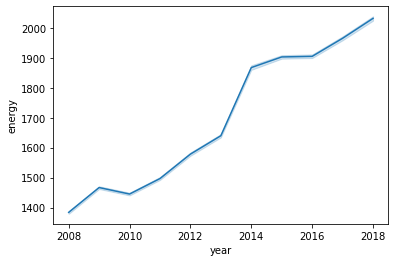

In [12]:
import seaborn as sns
sns.lineplot(data=df,x="year",y="energy")

In [13]:
num_col="year"
cat_col=["month","time","week","day"]

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    94992 non-null  int64 
 1   month   94992 non-null  int64 
 2   time    94992 non-null  object
 3   week    94992 non-null  int64 
 4   day     94992 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.6+ MB


2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


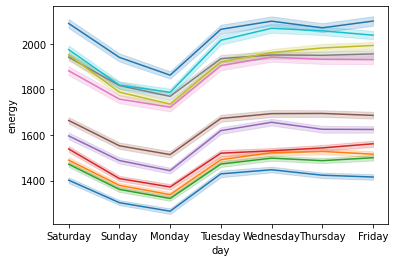

In [15]:
import seaborn as sns
for col in df["year"].unique():
  print(col)
  sns.lineplot(data=df[df["year"]==col],x="day",y="energy")
  plt.plot()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x[num_col]=scaler.fit_transform(x[[num_col]])
# x[num_col]=np.log(x[num_col])

x_test[num_col]=scaler.transform(x_test[[num_col]])
# x_test[num_col]=np.log(x_test[num_col])

In [17]:
x.head()

,year,month,time,week,day
0,-1.623794,3,00:00:00,9,Saturday
1,-1.623794,3,01:00:00,9,Saturday
2,-1.623794,3,02:00:00,9,Saturday
3,-1.623794,3,03:00:00,9,Saturday
4,-1.623794,3,04:00:00,9,Saturday


In [18]:
x_test.head()

,year,month,time,week,day
0,1.895734,1,00:00:00,1,Tuesday
1,1.895734,1,01:00:00,1,Tuesday
2,1.895734,1,02:00:00,1,Tuesday
3,1.895734,1,03:00:00,1,Tuesday
4,1.895734,1,04:00:00,1,Tuesday


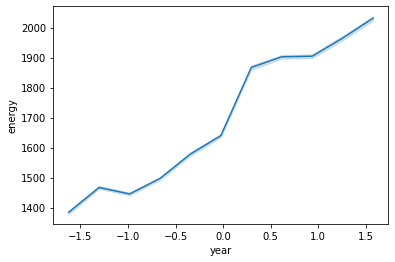

In [19]:
sns.lineplot(x=x["year"],y=y)

In [20]:
x_test[cat_col]=x_test[cat_col].astype('object')
x[cat_col]=x[cat_col].astype('object')


In [21]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    26304 non-null  float64
 1   month   26304 non-null  object 
 2   time    26304 non-null  object 
 3   week    26304 non-null  object 
 4   day     26304 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.0+ MB


In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)
OH_cols=pd.DataFrame(ohe.fit_transform(x[cat_col]))
OH_cols.index=x.index
OH_cols.columns=ohe.get_feature_names(cat_col)
x=x.drop(cat_col,axis=1)
x=pd.concat([x,OH_cols],axis=1)

OH_cols=pd.DataFrame(ohe.transform(x_test[cat_col]))
OH_cols.index=x_test.index
OH_cols.columns=ohe.get_feature_names(cat_col)
x_test=x_test.drop(cat_col,axis=1)
x_test=pd.concat([x_test,OH_cols],axis=1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
#CATBOOST
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import lightgbm
from lightgbm import LGBMRegressor 
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
# model=CatBoostRegressor(loss_function='RMSE',n_estimators=15000, verbose = 0)

In [25]:
# from catboost import CatBoostRegressor
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.metrics import r2_score
# # model=CatBoostRegressor(loss_function='RMSE',n_estimators=15000, verbose = 0)
# # cross_val_score(model, x_train, y_train,scoring="r2",cv=3)


# # model=CatBoostRegressor()
# # r2_score(y_train,model.predict(x_train))
# # model.fit(x_train,y_train)
# # r2_score(y_train,model.predict(x_train))
# # y_pred=model.predict(x_test)

In [26]:
y=np.log(y)
y.values.reshape(-1,1)

array([[7.13885554],
       [6.99900404],
       [6.96247781],
       ...,
       [7.76895368],
       [7.75916303],
       [7.68717997]])

# **Model**

In [27]:
xtrain_1=x["year"]
xtrain_2=x.drop(["year"],axis=1)

x_test_1=x_test["year"]
x_test_2=x_test.drop(["year"],axis=1)

In [37]:
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_2=CatBoostRegressor(loss_function='RMSE',n_estimators=2000, verbose = 0)
model_1.fit(xtrain_1.values.reshape(-1,1),y.values.reshape(-1,1))
y_1=model_1.predict(xtrain_1.values.reshape(-1,1))
# y-y_1
model_2.fit(xtrain_2,y-y_1.ravel())
y_pred_train=np.exp(model_2.predict(xtrain_2)+model_1.predict(xtrain_1.values.reshape(-1,1)).ravel())

y_2=np.exp(model_1.predict(x_test_1.values.reshape(-1,1)).ravel()+model_2.predict(x_test_2))




In [39]:

mean_squared_error(np.exp(y),y_pred_train)

25222.19678047317

In [40]:
y_2

array([2025.36082308, 1916.78973536, 1836.07592098, ..., 2873.61869682,
       2861.97087532, 2708.92044661])

**Hypertuning LGBM**

In [ ]:

# from sklearn.model_selection import GridSearchCV
# param={"n_estimators":[10,50,100,150,200]}
# model=LGBMRegressor()
# clf=GridSearchCV(model,param,cv=5,scoring='neg_mean_squared_error')
# clf.fit(x,y)

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'n_estimators': [10, 50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# clf.best_score_

-0.012503720127366714

In [ ]:
# clf.best_params_

{'n_estimators': 100}

**Catboost gridsearchcv 400**

In [34]:
from sklearn.model_selection import GridSearchCV
param={"n_estimators":[1000,2000,3000,5000,10000]}
model=CatBoostRegressor()
clf=GridSearchCV(model,param,cv=5,scoring='neg_mean_squared_error')
clf.fit(xtrain_2,y-y_1.ravel())


Streaming output truncated to the last 5000 lines.
7001:	learn: 0.0885699	total: 1m 5s	remaining: 28.2s
7002:	learn: 0.0885697	total: 1m 5s	remaining: 28.2s
7003:	learn: 0.0885695	total: 1m 5s	remaining: 28.2s
7004:	learn: 0.0885692	total: 1m 5s	remaining: 28.2s
7005:	learn: 0.0885691	total: 1m 5s	remaining: 28.2s
7006:	learn: 0.0885687	total: 1m 5s	remaining: 28.2s
7007:	learn: 0.0885684	total: 1m 5s	remaining: 28.2s
7008:	learn: 0.0885682	total: 1m 6s	remaining: 28.2s
7009:	learn: 0.0885680	total: 1m 6s	remaining: 28.2s
7010:	learn: 0.0885677	total: 1m 6s	remaining: 28.2s
7011:	learn: 0.0885674	total: 1m 6s	remaining: 28.1s
7012:	learn: 0.0885672	total: 1m 6s	remaining: 28.1s
7013:	learn: 0.0885669	total: 1m 6s	remaining: 28.1s
7014:	learn: 0.0885666	total: 1m 6s	remaining: 28.1s
7015:	learn: 0.0885663	total: 1m 6s	remaining: 28.1s
7016:	learn: 0.0885661	total: 1m 6s	remaining: 28.1s
7017:	learn: 0.0885659	total: 1m 6s	remaining: 28.1s
7018:	learn: 0.0885656	total: 1m 6s	remaining: 2

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f5d64bcc090>,
             param_grid={'n_estimators': [1000, 2000, 3000, 5000, 10000]},
             scoring='neg_mean_squared_error')

In [35]:
clf.best_score_

-0.009702246597044306

In [36]:
clf.best_params_

{'n_estimators': 2000}

catboost 400

In [27]:
model=CatBoostRegressor(loss_function='RMSE',n_estimators=300, verbose = 0)
model.fit(x,y)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)
# catboost_base =CatBoostRegressor(loss_function='RMSE',n_estimators=400, verbose = 0)
# catboost_base.fit(X_train, y_train,eval_set=(X_val, y_val))
# # model.fit(x,y)

In [ ]:
# catboost_base.predict(x)

array([7.07155777, 7.00949975, 6.97401312, ..., 7.66491915, 7.64925315,
       7.61429395])

In [28]:
model.predict(x)

array([7.05890546, 6.99898597, 6.95179132, ..., 7.66185293, 7.65094243,
       7.62335755])

RandomForest

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param={"n_estimators":[100,300,400,500,1000]}
# model=RandomForestRegressor()
# clf=GridSearchCV(model,param,cv=5,scoring='neg_mean_squared_error')
# clf.fit(x,y)

KeyboardInterrupt: ignored

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

In [52]:
models = {'gbr':GradientBoostingRegressor(learning_rate= 0.001,max_depth= 8,n_estimators= 1000,subsample=0.5),
          'br':BayesianRidge(),
          'rf':RandomForestRegressor(n_estimators=200,criterion='squared_error'),
          'lgbm':LGBMRegressor(n_estimators=100,scoring='neg_mean_squared_error'),
          'catboost':CatBoostRegressor(loss_function='RMSE',n_estimators=400, verbose = 0)}


MSE 0.004231395289622528

In [29]:
mean_squared_error(y,model.predict(x))

0.004313278579892644

In [30]:
mean_squared_error(np.exp(y),np.exp(model.predict(x)))

13587.665293633361

In [71]:
a=[1,2,3]
b=a
a[2]=2
b[2]=6
print(a[2])
print(b[2])

6
6


In [ ]:
# y_test=model.predict(x_test)

In [49]:
y_test=np.exp(model.predict(x_test))

In [ ]:
# y_test.astype(int)

In [50]:
y_test

array([1639.03102297, 1559.98000731, 1514.06664605, ..., 2238.03740082,
       2230.80887033, 2123.35514342])

In [42]:
x_sub=pd.read_csv("/content/sample_submission_jn0a7vR.csv")
submission_test=x_sub
submission_test["energy"]=y_2
submission_test.to_csv('/content/submission__test.csv',index= False)

In [ ]:
submission_test.head()

In [ ]:
x_test=pd.read_csv("/content/test_WudNWDM.csv")
x_test.head()

In [ ]:
x_sub=pd.read_csv("/content/sample_submission_jn0a7vR.csv")
x_sub.head()

operation 

In [53]:
for name, model in models.items():
  model.fit(x,y)

In [54]:
results1 = {}

for name, model in models.items():
    result = mean_squared_error(y,model.predict(x))
    results1[name] = result

In [55]:
for name, result in results1.items():
    print("----------\n" + name)
    print(result)

----------
gbr
0.0163396276259543
----------
br
0.011178397024516664
----------
rf
0.00044857473085022586
----------
lgbm
0.005102029377972257
----------
catboost
0.0033928434486469247


----------
gbr
0.018925377847097438
----------
br
0.011145443863337923
----------
ridge
0.011145337642079879
----------
lgbm
0.00622831675481391
----------
catboost
0.004231395289622528

In [ ]:
# y_pred=(
#     (0.05 * np.exp(models['gbr'].predict(x))) +
#     (0.05 * np.exp(models['br'].predict(x))) +
#     (.05 * np.exp(models['ridge'].predict(x)))+
#     (0.35 * np.exp(models['lgbm'].predict(x)))+
#     (0.5 * np.exp(models['catboost'].predict(x)))
#     )



In [ ]:
y_pred=(
    (0.00 * np.exp(models['gbr'].predict(x))) +
    (0.00 * np.exp(models['br'].predict(x))) +
    (1 * np.exp(models['rf'].predict(x)))+
    (0.0 * np.exp(models['lgbm'].predict(x)))+
    (0.0 * np.exp(models['catboost'].predict(x)))
    )

In [ ]:
mean_squared_error(df["energy"],y_pred)

1416.3311566948157

In [ ]:
y_pred

array([1234.05273498, 1103.37304388, 1059.42607675, ..., 2378.95812146,
       2357.11305559, 2212.06617626])

In [ ]:
(0.05 * np.exp(models['gbr'].predict(x)))

In [ ]:
df["energy"]

In [ ]:
y_pred=np.exp(models['catboost'].predict(x))
mean_squared_error(df["energy"],y_pred)

In [ ]:
y_pred

In [ ]:
df["energy"]

In [ ]:
y_test=(
    (0.0 * models['gbr'].predict(x_test)) +
    (0.0 * models['br'].predict(x_test)) +
    (1 * np.exp(models['rf'].predict(x_test)))+
    (0 * np.exp(models['lgbm'].predict(x_test)))+
    (0 * np.exp(models['catboost'].predict(x_test)))  )

In [ ]:
submission_test=df_test[["campaign_id"]]
submission_test["click_rate"]=y_pred
submission_test.to_csv('/content/submission_hyp12.csv',index= False)